# load mmm samples

In [1]:
%include "EnableIPythonDisplay.swift"

import TensorFlow
import PythonKit
import Foundation

// let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

let pd = Python.import("pandas")

%include "Sources/MotionDataset/MotionFrame.swift"
%include "Sources/MotionDataset/MotionSample.swift"
%include "Sources/MotionDataset/MotionDataset.swift"

In [2]:
// TODO: create api for saving the image

In [ ]:
// + load few hundred samples
// + get all numbers
// + get min/max

In [ ]:
// print(motionSample.annotations)

In [ ]:
// TODO: create class that converts dataset to png

In [34]:
let datasetFolderURL = URL(fileURLWithPath: "/notebooks/language2motion.gt/data/2017-06-22/")

let date = Date()
var motionDataset = MotionDataset(datasetFolderURL: datasetFolderURL, maxSamples: 4000)
print(abs(date.timeIntervalSinceNow))

Sample 1, 00001_mmm.xml, 00001_annotations.json
Sample 2, 00002_mmm.xml, 00002_annotations.json
Sample 3, 00003_mmm.xml, 00003_annotations.json
Sample 4, 00004_mmm.xml, 00004_annotations.json
Sample 5, 00005_mmm.xml, 00005_annotations.json
Sample 6, 00006_mmm.xml, 00006_annotations.json
Sample 7, 00007_mmm.xml, 00007_annotations.json
Sample 8, 00008_mmm.xml, 00008_annotations.json
Sample 9, 00009_mmm.xml, 00009_annotations.json
Sample 10, 00010_mmm.xml, 00010_annotations.json
Sample 11, 00011_mmm.xml, 00011_annotations.json
Sample 12, 00012_mmm.xml, 00012_annotations.json
** Sample 12 doesn't exist.
Sample 13, 00013_mmm.xml, 00013_annotations.json
Sample 14, 00014_mmm.xml, 00014_annotations.json
Sample 15, 00015_mmm.xml, 00015_annotations.json
Sample 16, 00016_mmm.xml, 00016_annotations.json
Sample 17, 00017_mmm.xml, 00017_annotations.json
Sample 18, 00018_mmm.xml, 00018_annotations.json
Sample 19, 00019_mmm.xml, 00019_annotations.json
Sample 20, 00020_mmm.xml, 00020_annotations.json
S

In [35]:
print(motionDataset.describe())

MotionDataset(motionSamples: 3911)


In [13]:
// TODO: pad/clip motions to maxTimestep

# visualize sample

In [17]:
let gjp186 = m186.getJointPositions(grouppedJoints: true, normalized: true)
let gjp186np = m186.getJointPositions(grouppedJoints: true, normalized: true).makeNumpyArray()

In [18]:
(np.amin(gjp186np), np.amax(gjp186np))

▿ 2 elements
  - .0 : 0.21045366
  - .1 : 0.7269764


In [19]:
func plotMotionSample(motionSample: MotionSample, grouppedJoints: Bool) {
    let position = motionSample.getJointPositions(grouppedJoints: grouppedJoints, normalized: true).makeNumpyArray()    
    let x = plt.subplots()
    let ax = x[1]
    // cmaps: viridis, gist_rainbow, bwr, seismic, coolwarm, hsv, plasma*, PRGn, twilight_shifted, Spectral...
    ax.imshow(position.T, interpolation: "nearest", extent: [0, 1, 0, 1], cmap: "Spectral")
    ax.axis("off")
    ax.set_title("\(motionSample.describe()) \(motionSample.annotations[0])")

    plt.show()
}
// plotMotionSample(motionSample: m186, grouppedJoints: true)

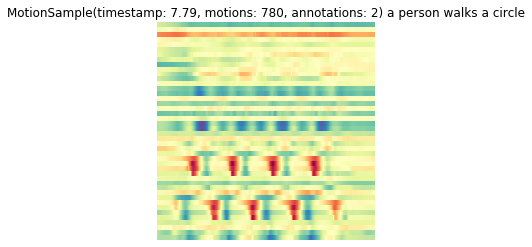

In [20]:
plotMotionSample(motionSample: m186, grouppedJoints: true)

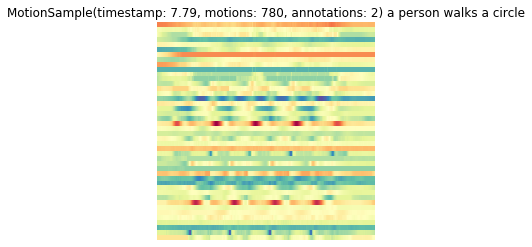

In [21]:
plotMotionSample(motionSample: m186, grouppedJoints: false)

# load labels

In [36]:
let labels_path = "/notebooks/language2motion.gt/data/labels_ds_v2_manual_labels.csv"

In [37]:
let labels_df = pd.read_csv(labels_path)
labels_df

      sample_id  ...               label
0             1  ...  Walking or running
1             2  ...   Walking few steps
2             3  ...  Walking or running
3             4  ...  Walking or running
4             5  ...   Walking few steps
...         ...  ...                 ...
3007       3961  ...  Walking or running
3008       3962  ...  Walking or running
3009       3964  ...     Doing something
3010       3965  ...     Doing something
3011       3966  ...   Walking few steps

[3012 rows x 5 columns]


In [38]:
let rows = Python.list(labels_df.iterrows())

In [39]:
for row_tuple in rows[0..<3] {
    let row = row_tuple[1]
    let sample_id = Int(row.sample_id)!
    let label = String(row.label)!
    let t = (sample_id, label)
    print(t)
}

(1, "Walking or running")
(2, "Walking few steps")
(3, "Walking or running")


In [40]:
let labels = rows.map 
{ (row_tuple: PythonObject) -> (sample_id: Int, label: String) in 
    let row = row_tuple[1]
    let sample_id = Int(row.sample_id)!
    let label = String(row.label)!
    let t = (sample_id, label) 
    return t
}
labels[0..<3]

▿ 3 elements
  ▿ 0 : 2 elements
    - sample_id : 1
    - label : "Walking or running"
  ▿ 1 : 2 elements
    - sample_id : 2
    - label : "Walking few steps"
  ▿ 2 : 2 elements
    - sample_id : 3
    - label : "Walking or running"


In [41]:
var labels_dict: [Int:String] = [:]

In [42]:
print(type(of: labels_dict))

Dictionary<Int, String>


In [43]:
for t in labels {
    labels_dict[t.sample_id] = t.label
}

In [44]:
labels_dict[12]

nil


# save pngs

In [45]:
func saveMotionSampleImage(pngURL: URL, motionSample: MotionSample, grouppedJoints: Bool, show: Bool) {
    let position = motionSample.getJointPositions(grouppedJoints: grouppedJoints, normalized: true).makeNumpyArray()    
    
    let fig = plt.figure()
    fig.set_size_inches([1, 1])
    
    let ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.imshow(position.T, interpolation: "nearest", extent: [0, 1, 0, 1], cmap: "Spectral")
    ax.axis("off")
    fig.add_axes(ax)

    plt.savefig(pngURL.path, dpi: 224)
    if (show) {
        plt.show()
    }
    plt.close(fig)
}
// let outputPath = URL(fileURLWithPath:"/notebooks/language2motion.gt/data/output/image00001.png")
// saveMotionSampleImage(pngURL: outputPath, motionSample: motionSample, grouppedJoints: true, show: true)

In [46]:
// TODO: refactor

In [48]:
let date = Date()
// output_non-groupped, grouppedJoints: false
// output, grouppedJoints: true
// let pngFolderURL = URL(fileURLWithPath: "/notebooks/language2motion.gt/data/output_sigmoid/")
let pngFolderURL = URL(fileURLWithPath: "/notebooks/language2motion.gt/data/output_dataset/")
let maxSamples = motionDataset.motionSamples.count

let fm = FileManager()

for i in 0..<maxSamples {
    let motionSample = motionDataset.motionSamples[i]
    let label = labels_dict[motionSample.sampleID]
    if label != nil {
        let classFolderURL = pngFolderURL.appendingPathComponent(label!)
        
        fm.createDirectory(at: classFolderURL, withIntermediateDirectories: true)
        
        let pngFilename = String(format: "%05d.png", motionSample.sampleID)
        let pngURL = classFolderURL.appendingPathComponent(pngFilename)
        print(i, motionSample.describe())
        saveMotionSampleImage(pngURL: pngURL, motionSample: motionSample, grouppedJoints: true, show: false)
    }
}

print(abs(date.timeIntervalSinceNow))

0 MotionSample(timestamp: 3.77, motions: 378, annotations: 1)
1 MotionSample(timestamp: 5.3, motions: 531, annotations: 1)
2 MotionSample(timestamp: 5.68, motions: 569, annotations: 1)
3 MotionSample(timestamp: 5.65, motions: 566, annotations: 2)
4 MotionSample(timestamp: 5.88, motions: 589, annotations: 1)
5 MotionSample(timestamp: 6.15, motions: 616, annotations: 2)
6 MotionSample(timestamp: 5.79, motions: 580, annotations: 2)
7 MotionSample(timestamp: 6.19, motions: 620, annotations: 1)
8 MotionSample(timestamp: 6.29, motions: 630, annotations: 3)
9 MotionSample(timestamp: 6.23, motions: 624, annotations: 1)
10 MotionSample(timestamp: 5.5, motions: 551, annotations: 2)
11 MotionSample(timestamp: 5.65, motions: 566, annotations: 1)
12 MotionSample(timestamp: 5.43, motions: 544, annotations: 1)
13 MotionSample(timestamp: 5.87, motions: 588, annotations: 1)
14 MotionSample(timestamp: 5.39, motions: 540, annotations: 9)
15 MotionSample(timestamp: 4.4, motions: 441, annotations: 3)
16 Mo

In [ ]:
// TODO: check is_moving flag values - will need after padding